# https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import *
#import lux

train_df = pd.read_csv("./aug_train.csv", header="infer")

test_df = pd.read_csv("./aug_test.csv", header="infer")

In [2]:
train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [3]:
test_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [4]:
train_df.drop(["enrollee_id"], axis=1, inplace=True)
test_df.drop(["enrollee_id"], axis=1, inplace=True)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


In [6]:
def get_ordinal_values(train, test, column):
    values = set(train[column].value_counts().keys().to_list()).union(set(test[column].value_counts().keys().to_list()))

    values = [str(x) for x in sorted([int(x) for x in list(values)])]

    return values


In [7]:
train_df["last_new_job"] = train_df["last_new_job"].replace(">4", "5").replace("never", 6)
train_df["experience"] = train_df["experience"].replace(">20", "21").replace("<1", "0")
train_df["company_size"] = train_df["company_size"].replace("<10", "9")

test_df["last_new_job"] = test_df["last_new_job"].replace(">4", "5").replace("never", 6)
test_df["experience"] = test_df["experience"].replace(">20", "21").replace("<1", "0")
test_df["company_size"] = test_df["company_size"].replace("<10", "9")



#experience_values = [str(x) for x in sorted (train_df["experience"].value_counts().keys().to_list())]
#last_new_job_values = [str(x) for x in sorted (train_df["last_new_job"].value_counts().keys().to_list())]
#company_size_values =  [str(x) for x in sorted (train_df["company_size"].value_counts().keys().to_list())]
#train_df["last_new_job"] = train_df["last_new_job"].astype("int64")
#test_df["last_new_job"] = test_df["last_new_job"].astype("int64")

#train_df["experience"] = train_df["experience"].astype("int64")
#test_df["experience"] = test_df["experience"].astype("int64")


train_df["target"] = train_df["target"].astype("int64")



In [8]:
experience_values = get_ordinal_values(train_df, test_df, "experience")
last_new_job_values = get_ordinal_values(train_df, test_df, "last_new_job")

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    2129 non-null   object 
 1   city_development_index  2129 non-null   float64
 2   gender                  1621 non-null   object 
 3   relevent_experience     2129 non-null   object 
 4   enrolled_university     2098 non-null   object 
 5   education_level         2077 non-null   object 
 6   major_discipline        1817 non-null   object 
 7   experience              2124 non-null   object 
 8   company_size            1507 non-null   object 
 9   company_type            1495 non-null   object 
 10  last_new_job            2089 non-null   object 
 11  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 199.7+ KB


In [35]:
#train_df.intent = ["target"]
#train_df

In [12]:
print (experience_values)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']


In [24]:
test_df["relevent_experience"].value_counts()

Has relevent experience    1524
No relevent experience      605
Name: relevent_experience, dtype: int64

In [14]:
for c in train_df.columns:
    print (c, len(train_df[c].unique()))

city 123
city_development_index 93
gender 4
relevent_experience 2
enrolled_university 4
education_level 6
major_discipline 7
experience 23
company_size 9
company_type 7
last_new_job 7
training_hours 241
target 2


In [15]:
data = train_df.sample(frac=0.95, random_state=786)
data_unseen = train_df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (18200, 13)
Unseen Data For Predictions: (958, 13)


In [16]:
my_ordinal_features = { "last_new_job" : last_new_job_values, "experience": experience_values, "education_level": ["Primary School", "High School", "Graduate", "Masters", "Phd"], "company_size": ["9", "10/49", "50-99", "100-500", "500-999", "1000-4999", "5000-9999", "10000+"]}


exp_clf101 = setup(data = data, target = 'target', session_id=123, ordinal_features=my_ordinal_features)



,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(18200, 13)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,10
8,Ordinal Features,True
9,High Cardinality Features,False


In [17]:
#best_model = compare_models(exclude = ['xgboost'])

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7932,0.7971,0.5660,0.5896,0.5775,0.4407,0.4409,0.2190
gbc,Gradient Boosting Classifier,0.7919,0.7990,0.5154,0.5967,0.5528,0.4182,0.4203,0.8010
catboost,CatBoost Classifier,0.7893,0.7986,0.5264,0.5874,0.5550,0.4176,0.4188,9.6370
xgboost,Extreme Gradient Boosting,0.7868,0.7887,0.5097,0.5836,0.5441,0.4058,0.4075,1.2680
rf,Random Forest Classifier,0.7808,0.7841,0.4531,0.5781,0.5078,0.3694,0.3741,0.6800
lda,Linear Discriminant Analysis,0.7793,0.7874,0.4214,0.5797,0.4879,0.3517,0.3590,0.1530
lr,Logistic Regression,0.7772,0.7902,0.3425,0.5935,0.4341,0.3077,0.3258,1.6520
ridge,Ridge Classifier,0.7748,0.0000,0.3434,0.5834,0.4321,0.3032,0.3199,0.0630
ada,Ada Boost Classifier,0.7735,0.7892,0.3299,0.5813,0.4205,0.2930,0.3113,0.3670
et,Extra Trees Classifier,0.7671,0.7581,0.4425,0.5410,0.4865,0.3379,0.3409,0.8430


In [18]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [19]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8077,0.8085,0.5912,0.6205,0.6055,0.4784,0.4787
1,0.7857,0.7892,0.5535,0.5733,0.5632,0.4213,0.4214
2,0.7912,0.8108,0.5755,0.5828,0.5791,0.4403,0.4403
3,0.8116,0.8107,0.5912,0.6309,0.6104,0.4863,0.4868
4,0.7943,0.8002,0.5440,0.5966,0.5691,0.4344,0.4352
5,0.7975,0.7979,0.5755,0.5980,0.5865,0.4525,0.4527
6,0.7724,0.7737,0.5283,0.5455,0.5367,0.3859,0.3860
7,0.7920,0.7840,0.5818,0.5836,0.5827,0.4442,0.4442
8,0.7834,0.7838,0.5377,0.5700,0.5534,0.4106,0.4109
9,0.7965,0.8126,0.5818,0.5949,0.5882,0.4532,0.4532


In [20]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8014,0.8171,0.5377,0.6173,0.5748,0.4460,0.4479
1,0.7873,0.7961,0.5283,0.5813,0.5535,0.4143,0.4152
2,0.8006,0.8164,0.5660,0.6081,0.5863,0.4552,0.4557
3,0.8030,0.8163,0.5157,0.6284,0.5665,0.4406,0.4442
4,0.7959,0.8115,0.5031,0.6107,0.5517,0.4212,0.4245
5,0.7967,0.7964,0.5283,0.6065,0.5647,0.4329,0.4347
6,0.7794,0.7903,0.5063,0.5649,0.5340,0.3901,0.3911
7,0.7889,0.7982,0.5283,0.5854,0.5554,0.4174,0.4183
8,0.7857,0.7932,0.5346,0.5763,0.5546,0.4138,0.4143
9,0.8005,0.8053,0.5566,0.6103,0.5822,0.4515,0.4524


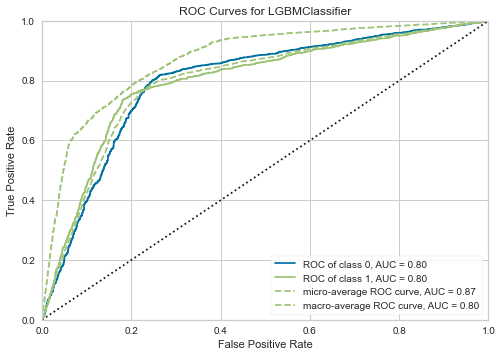

In [21]:
plot_model(tuned_lightgbm, plot = 'auc')

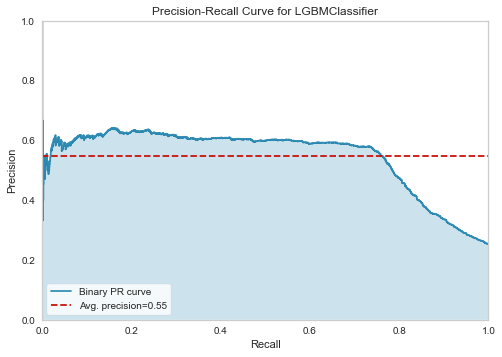

In [22]:
plot_model(tuned_lightgbm, plot = 'pr')

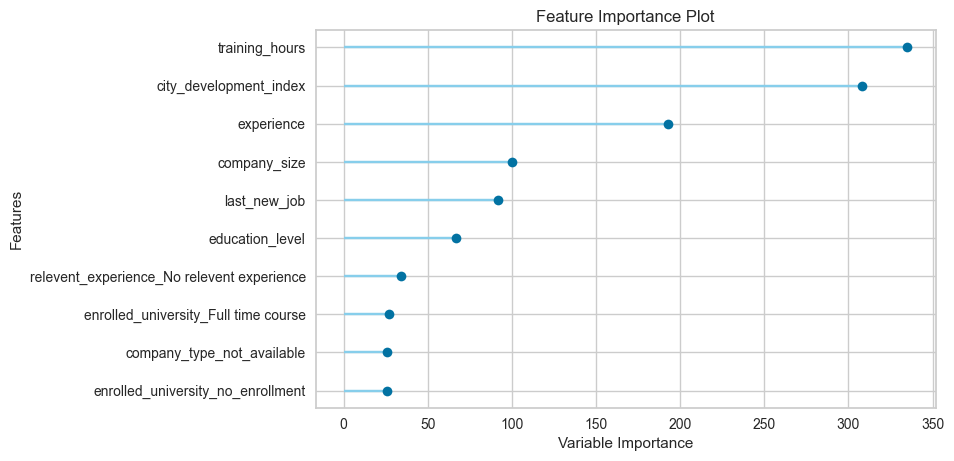

In [23]:
plot_model(tuned_lightgbm, plot='feature')

In [25]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [26]:
predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7916,0.7990,0.5278,0.6008,0.5620,0.4260,0.4275


,city_development_index,education_level,experience,company_size,last_new_job,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,...,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_not_available,target,Label,Score
0,0.579,3.0,7.0,1.0,2.0,85.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.5979
1,0.698,3.0,4.0,2.0,1.0,55.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0.5970
2,0.827,3.0,6.0,0.0,1.0,77.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0.5357
3,0.754,2.0,5.0,0.0,1.0,298.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.6931
4,0.910,3.0,16.0,2.0,1.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5456,0.920,3.0,6.0,4.0,2.0,90.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9336
5457,0.939,3.0,21.0,6.0,5.0,26.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9359
5458,0.802,3.0,22.0,0.0,5.0,75.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0.7561
5459,0.910,3.0,13.0,7.0,1.0,122.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9271


In [27]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [28]:
print(final_lightgbm)

LGBMClassifier(bagging_fraction=0.4, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.6,
               importance_type='split', learning_rate=0.059, max_depth=-1,
               min_child_samples=40, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=130, n_jobs=-1, num_leaves=20, objective=None,
               random_state=123, reg_alpha=5, reg_lambda=0.15, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


# Predict on unseen data

In [29]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)

In [30]:
unseen_predictions.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Label,Score
0,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1,1,0.5232
1,city_71,0.884,Male,No relevent experience,no_enrollment,NaN,NaN,3,NaN,NaN,6,106,0,0,0.9251
2,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,NaN,NaN,2,19,0,1,0.6268
3,city_13,0.827,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,10/49,Pvt Ltd,1,29,0,0,0.9027
4,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,5,500-999,NaN,1,140,0,0,0.8331


In [31]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['target'], unseen_predictions['Label'], metric = 'Accuracy')

0.8152

In [32]:
new_prediction = predict_model(final_lightgbm, data=test_df)

In [33]:
new_prediction

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,Label,Score
0,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,9,NaN,1,21,0,0.8706
1,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98,0,0.7378
2,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,0,NaN,Pvt Ltd,6,15,1,0.5452
3,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39,0,0.9243
4,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,10000+,Pvt Ltd,5,72,0,0.9200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,0,0.6218
2125,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,0,0.8517
2126,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,6,18,0,0.9058
2127,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,0,0.8838
